Раз уж можно два в одном сделать, то так и поступим.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [2]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
X.shape

(2, 10)

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [26]:
n = X.shape[1]
alpha = 1e-4 # 0.1

W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.0001)

In [15]:
# исходный код
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)

0 [1.04502 0.54502] 3173.15
100 [4.71884428 4.21884428] 1795.372786768742
200 [7.1402917 6.6402917] 1196.8339637692059
300 [8.73628737 8.23628737] 936.8146230533869
400 [9.78822107 9.28822107] 823.8561064989115
500 [10.48155912  9.98155912] 774.7842704306371
600 [10.93854386 10.43854386] 753.4663108064917
700 [11.23974622 10.73974622] 744.2052878053473
800 [11.43827114 10.93827114] 740.1820816195831
900 [11.56912052 11.06912052] 738.4343062376228


После втыкания в этот чудо код, показалось подозрительным, что
в матричных операциях решила потусоваться сумма - как белый парень 
посреди гетто))
Так что просто меняем sum() на dot() и все в порядке


In [17]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.dot(X, (y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)

0 [1.01102 0.534  ] 3173.15
100 [2.02168794 3.452835  ] 2207.6942101483005
200 [2.88306663 5.58962851] 1670.7027004086372
300 [3.63289519 7.14848061] 1368.0832412796258
400 [4.29908617 8.28027926] 1193.7493344933293
500 [4.90228732 9.09657298] 1089.714750358689
600 [5.45777535 9.67982684] 1024.2828984889413
700 [ 5.97685612 10.0910047 ] 980.1260644155933
800 [ 6.46789973 10.37517467] 947.770026039189
900 [ 6.93710574 10.56565326] 922.0330206910179


А теперь поиграемся со скоростью обучения (с итерациями особо нет смысла играть - по задумке итерации будут по оси Ox на графике, так что по графику будет видно, когда примерно повышение числа итераций перестанет приносить ощутимый эффект)


In [41]:
list_alpha = [0.1, 0.05, 0.01, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5, 1e-5,
             5e-6, 1e-6]


In [ ]:
figsize = (6, 3)
for col in NUM_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(train_df[col], shade=True, label='train', color='r')
    sns.kdeplot(test_df[col], shade=True, label='test', color='b')
    print(col)
    print(mannwhitneyu(train_df[col], test_df[col]))
    plt.yscale('log')
    plt.legend()
    plt.title(col)
    plt.show()

0 [12.02 34.5 ] 3173.15
100 [1.21092169e+31 6.55765787e+31] 1.6499598531554106e+64
200 [3.40912000e+61 1.84618401e+62] 1.3077533388173705e+125
300 [9.59772979e+91 5.19758039e+92] 1.0365214595478345e+186
400 [2.70205851e+122 1.46328003e+123] 8.215438678021291e+246
500 [7.60713247e+152 4.11958697e+153] inf
600 [2.14164365e+183 1.15979146e+184] inf
700 [6.02939088e+213 3.26517254e+214] inf
800 [1.69746047e+244 9.19247307e+244] inf
900 [4.77887752e+274 2.58796618e+275] inf
1000 [1.34540219e+305 7.28592718e+305] inf


<ipython-input-5-bd4c0e5d829e>:2: RuntimeWarning: overflow encountered in square
  err = np.mean((y - y_pred)**2)


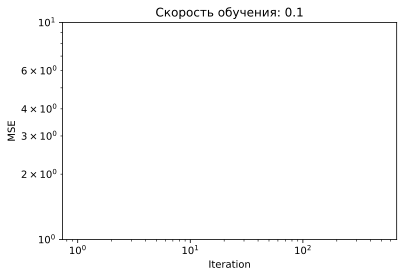

0 [ 6.51 17.5 ] 3173.15
100 [47.03142979  3.94777749] 45.96159894380851
200 [47.23117922  3.91089223] 45.93750055548497
300 [47.23213823  3.91071514] 45.937500000012804
400 [47.23214283  3.91071429] 45.93749999999999
500 [47.23214286  3.91071429] 45.9375
600 [47.23214286  3.91071429] 45.9375
700 [47.23214286  3.91071429] 45.9375
800 [47.23214286  3.91071429] 45.9375
900 [47.23214286  3.91071429] 45.9375
1000 [47.23214286  3.91071429] 45.9375


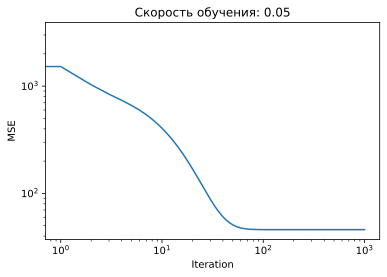

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666764
400 [46.56511152  4.03388672] 46.18175564810758
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758049
800 [47.2219474   3.91259695] 45.937557064435396
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219886


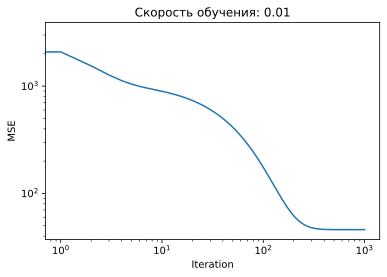

0 [1.551 2.2  ] 3173.15
100 [21.1833847   8.72081594] 414.5541707681393
200 [31.7649089   6.76685736] 175.90244862743472
300 [38.04800724  5.60663518] 91.75986564758271
400 [41.77878595  4.91771835] 62.09331136079918
500 [43.99404809  4.50865326] 51.63363194423746
600 [45.30942664  4.26575854] 47.94581257567725
700 [46.09047224  4.1215325 ] 46.64558040282556
800 [46.55424157  4.03589394] 46.18715130574685
900 [46.82961857  3.98504347] 46.02552075895959
1000 [46.99313195  3.95484948] 45.96853390140358


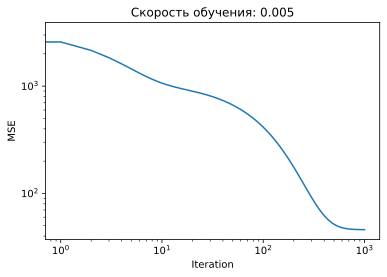

0 [1.1102 0.84  ] 3173.15
100 [ 7.43515582 10.71754582] 899.5990444359252
200 [11.44993589 10.49282195] 735.5540619653672
300 [14.98921624  9.8634316 ] 606.0048772266812
400 [18.17511588  9.27626113] 500.7989288428638
500 [21.04606457  8.74617136] 415.355423398327
600 [23.63334499  8.26841272] 345.9620646005472
700 [25.96499229  7.83785632] 289.60391048629987
800 [28.06626432  7.44984037] 243.83236130353197
900 [29.95992301  7.10016181] 206.65877484533294
1000 [31.66648131  6.78503276] 176.46806566379882


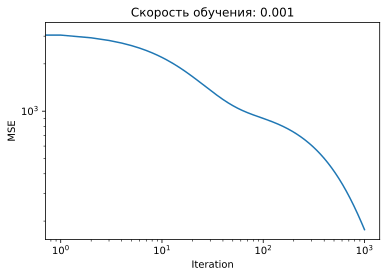

0 [1.0551 0.67  ] 3173.15
100 [4.93008943 9.14709059] 1087.8417937440565
200 [ 7.40958339 10.70078342] 899.8636338410433
300 [ 9.5010354  10.75475209] 811.4405276922266
400 [11.42908787 10.49504157] 735.6296795508777
500 [13.24687473 10.18045005] 667.4930561550157
600 [14.96979855  9.86691104] 606.0958093532413
700 [16.60481411  9.56600213] 550.7637630671202
800 [18.156846    9.27962841] 500.8973959104611
900 [19.63020214  9.00761025] 455.9567927185018
1000 [21.02889182  8.74934208] 415.45538922847237


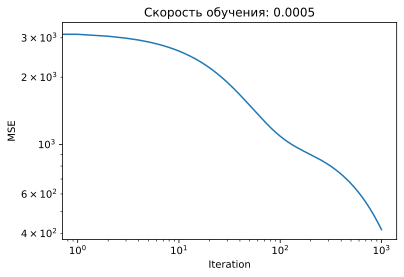

0 [1.01102 0.534  ] 3173.15
100 [2.02168794 3.452835  ] 2207.6942101483005
200 [2.88306663 5.58962851] 1670.7027004086372
300 [3.63289519 7.14848061] 1368.0832412796258
400 [4.29908617 8.28027926] 1193.7493344933293
500 [4.90228732 9.09657298] 1089.714750358689
600 [5.45777535 9.67982684] 1024.2828984889413
700 [ 5.97685612 10.0910047 ] 980.1260644155933
800 [ 6.46789973 10.37517467] 947.770026039189
900 [ 6.93710574 10.56565326] 922.0330206910179
1000 [ 7.38906894 10.68706909] 900.0794345405571


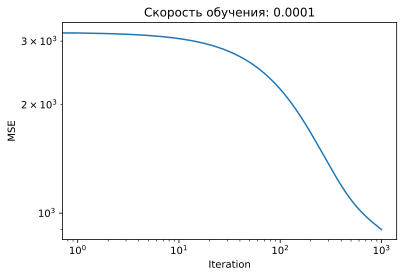

0 [1.00551 0.517  ] 3173.15
100 [1.53258303 2.09079026] 2619.973650311392
200 [2.01666937 3.43842953] 2208.2139296034047
300 [2.4636306  4.59162636] 1901.0546878453902
400 [2.87850807 5.57764749] 1671.2714222144837
500 [3.26563775 6.41993996] 1498.7323095812799
600 [3.62874904 7.13866624] 1368.5503102546434
700 [3.97104977 7.7511643 ] 1269.7167154088895
800 [4.29529921 8.27234329] 1194.0907047265976
900 [4.60387094 8.71502372] 1135.6521607385525
1000 [4.89880684 9.09023009] 1089.9491519837363


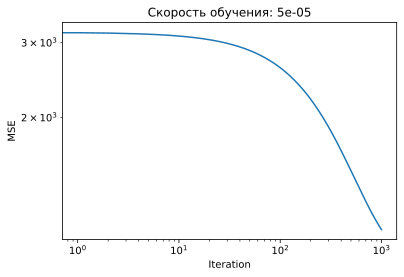

0 [1.001102 0.5034  ] 3173.15
100 [1.11030755 0.83814941] 3049.1025771214545
200 [1.21758227 1.16270929] 2932.194959811977
300 [1.32298218 1.47738267] 2822.009397496786
400 [1.42656161 1.78246357] 2718.1525965976502
500 [1.5283733  2.07823728] 2620.2542886804813
600 [1.62846841 2.3649806 ] 2527.9658824318126
700 [1.72689659 2.64296212] 2440.9591945563498
800 [1.82370602 2.91244245] 2358.9252549750754
900 [1.91894343 3.17367443] 2281.573181973955
1000 [2.01265419 3.42690342] 2208.6291232079006


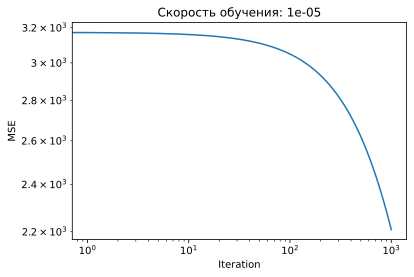

0 [1.000551 0.5017  ] 3173.15
100 [1.05540118 0.67038082] 3110.2113047117064
200 [1.10976152 0.83647566] 3049.1114991939476
300 [1.16363918 1.00002326] 2989.7959784630857
400 [1.21704121 1.16106177] 2932.211759933045
500 [1.26997456 1.31962879] 2876.3074352104336
600 [1.32244607 1.47576134] 2822.0331233219376
700 [1.37446249 1.62949588] 2769.3404253314293
800 [1.42603045 1.78086836] 2718.1823803054967
900 [1.4771565  1.92991414] 2668.513422587334
1000 [1.52784707 2.0766681 ] 2620.2893403401113


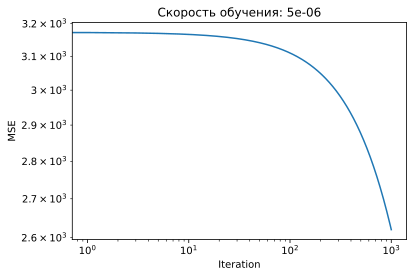

0 [1.0001102 0.50034  ] 3173.15
100 [1.01112017 0.53428702] 3160.413226378389
200 [1.02211031 0.56812935] 3147.7517892275946
300 [1.03308069 0.6018673 ] 3135.165235738187
400 [1.04403135 0.63550119] 3122.6531158238668
500 [1.05496237 0.66903132] 3110.2149821050884
600 [1.06587379 0.70245802] 3097.8503898927834
700 [1.07676568 0.73578159] 3085.558897172179
800 [1.08763809 0.76900235] 3073.340064586716
900 [1.09849107 0.80212061] 3061.1934554220597
1000 [1.1093247  0.83513666] 3049.1186355902123


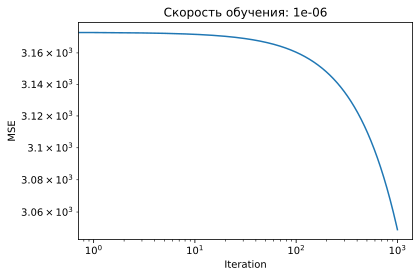

In [49]:
for alpha in list_alpha:
    list_iter, list_err = [], []
    W = np.array([1, 0.5])
    if alpha == 0.1 or 0.05 or 0.01:
        l = 1001
    elif alpha == 5e-3 or 1e-3:
        l = 10000
    else:
        l = 100000
    for i in range(l):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        '''for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
        W -= (alpha * (1/n * 2 * np.dot(X, (y_pred - y))))
        if l == 1001:
            list_iter.append(i)
            list_err.append(err)
            if i % 100 == 0:
                print(i, W, err)
        else:
            if i % 1000 == 0:
                print(i, W, err)
            if i % 100 == 0:
                list_iter.append(i)
                list_err.append(err)
        
    plt.plot(list_iter, list_err)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
#     plt.legend()
    plt.title(f'Скорость обучения: {alpha}')
    plt.show()

Какой вывод мы делаем: скорость обучения 0.1 ставить точно не стоит - 
ошибка почти мгновенно улетает в стратосферу.
Оптимальней всего скорость 0.05 - достаточно будет 100 итераций (200, если нужна точность как в ракетостроении))
Медленнее можно, если хочется свою машину немного подзагрузить - тогда
хоть скорость 1е-10 и 1е10 итераций, может часа пол погоняет, но ркзультат в конечном счете будет тот же))